In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [4]:
#dataset with categorical data "Attendance"
raw_data = pd.read_csv('Dummies_dataset.csv')

In [5]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
5,1670,2.91,No
6,1764,3.00,No
7,1764,3.00,No
8,1792,3.01,No
9,1850,3.01,No


In [6]:
data = raw_data

In [7]:
#intuitively transform Yes:1 and No:0 by pandas
data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0})

In [8]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
5,1670,2.91,0
6,1764,3.00,0
7,1764,3.00,0
8,1792,3.01,0
9,1850,3.01,0


In [9]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Regression

In [10]:
y = data['GPA']
x1 = data[['SAT','Attendance']]

In [17]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           2.19e-15
Time:                        21:33:10   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Attended (dummy =1)
    GPA = 0.8665 +0.0014*SAT
   
#### Not Attended (dummy =0)
    GPA = 0.6439 + 0.00114*SAT

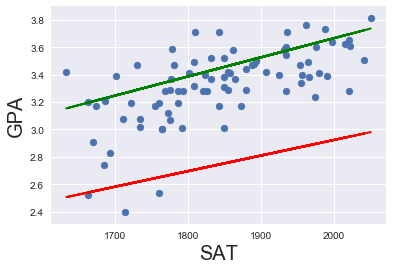

In [19]:
plt.scatter(data['SAT'],y)
yhat_no = 0.6439 + 0.00114*data['SAT']
yhat_yes = 0.8665 +0.0014*data['SAT']
#Not Attended : RED LINE
fig = plt.plot(data['SAT'], yhat_no , lw=2 , c='RED' , label='Not Attended')
#Attended : GREEN LINE
fig = plt.plot(data['SAT'], yhat_yes , lw=2 , c='GREEN' , label='Attended')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

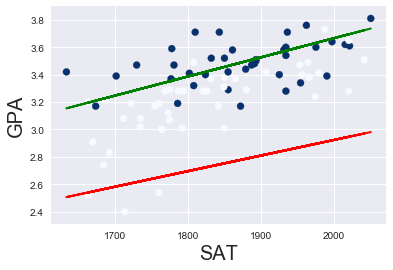

In [22]:
#Attended students plotted as blue.
plt.scatter(data['SAT'],y, c=data['Attendance'],cmap='Blues')
yhat_no = 0.6439 + 0.00114*data['SAT']
yhat_yes = 0.8665 +0.0014*data['SAT']
#Not Attended : RED LINE
fig = plt.plot(data['SAT'], yhat_no , lw=2 , c='RED' , label='Not Attended')
#Attended : GREEN LINE
fig = plt.plot(data['SAT'], yhat_yes , lw=2 , c='GREEN' , label='Attended')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

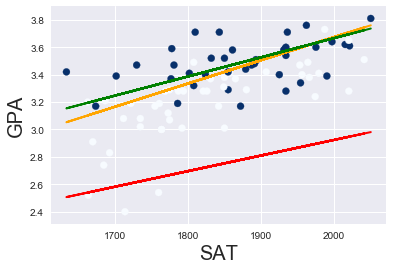

In [26]:
plt.scatter(data['SAT'],y, c=data['Attendance'],cmap='Blues')
yhat_no = 0.6439 + 0.00114*data['SAT']
yhat_yes = 0.8665 +0.0014*data['SAT']
yhat = 0.0017*data['SAT'] + 0.275
#Original regression without categorical data, ORANGE LINE
fig = plt.plot(data['SAT'],yhat, lw=2, c = 'orange',label = 'regression line')
fig = plt.plot(data['SAT'], yhat_no , lw=2 , c='RED' , label='Not Attended')
fig = plt.plot(data['SAT'], yhat_yes , lw=2 , c='GREEN' , label='Attended')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()